In [ ]:
# https://archive.ics.uci.edu/dataset/2/adult

### Binary classification to determine features to determine income range

#### Step1: Import libraries

In [71]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from scipy import stats
import matplotlib.pyplot as plt

#Import Required sklearn libraries
from sklearn import preprocessing
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Import Required models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error

#Import required models
import xgboost as xgb

In [7]:
#pip install ucimlrepo
# Needs to be installed to fetch data directly from source

### Import dataset

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features #Features
y = adult.data.targets  #Target
  
# metadata 
#print(adult.metadata) 
  
# variable information 
#print(adult.variables) 


In [3]:
X.head() # the features for the income data set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
print('The number of entries in the dataset is : {}'.format(len(X)))


The number of entries in the dataset is : 48842


In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


#### Data Exploration and cleaning

The features and target datasets need to be merged into one sigular datafrme df, to allow for easier data exploration and cleaning

In [6]:
# Merging xfeatures and Targets  into single dataframe to allow for easy data cleaning and prep
df = pd.merge(X,y, left_index= True, right_index= True, how='inner')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
#df2 = df.copy()
df=df2.copy()

In [91]:
null_counts = df.isnull().sum()
print (null_counts)


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [92]:
#Dropping nulls in occupation columns automatically removes nulls in workclass
df.dropna(subset=['occupation', 'native-country'], inplace=True)
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

The null values have now been removed. Now We proceed to checking the data information and description. 

In [93]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


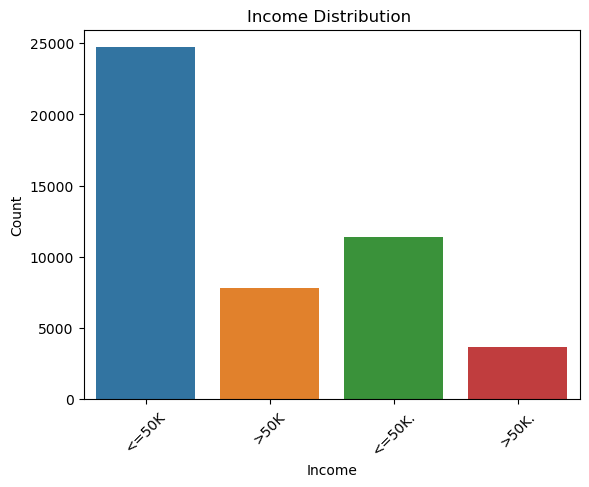

In [94]:
## Distribution of income
sns.countplot(x=df['income'], data=df)
plt.title('Income Distribution ')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

We can see that there is an issue with the Income data. So we will do a bit of cleaning.

In [95]:

df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K','>50K'])
df['income'].value_counts()

income
<=50K    36080
>50K     11541
Name: count, dtype: int64

In [30]:
#df['income'] = pd.to_numeric(df['income'], errors='coerce')


### Data Visualizations

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

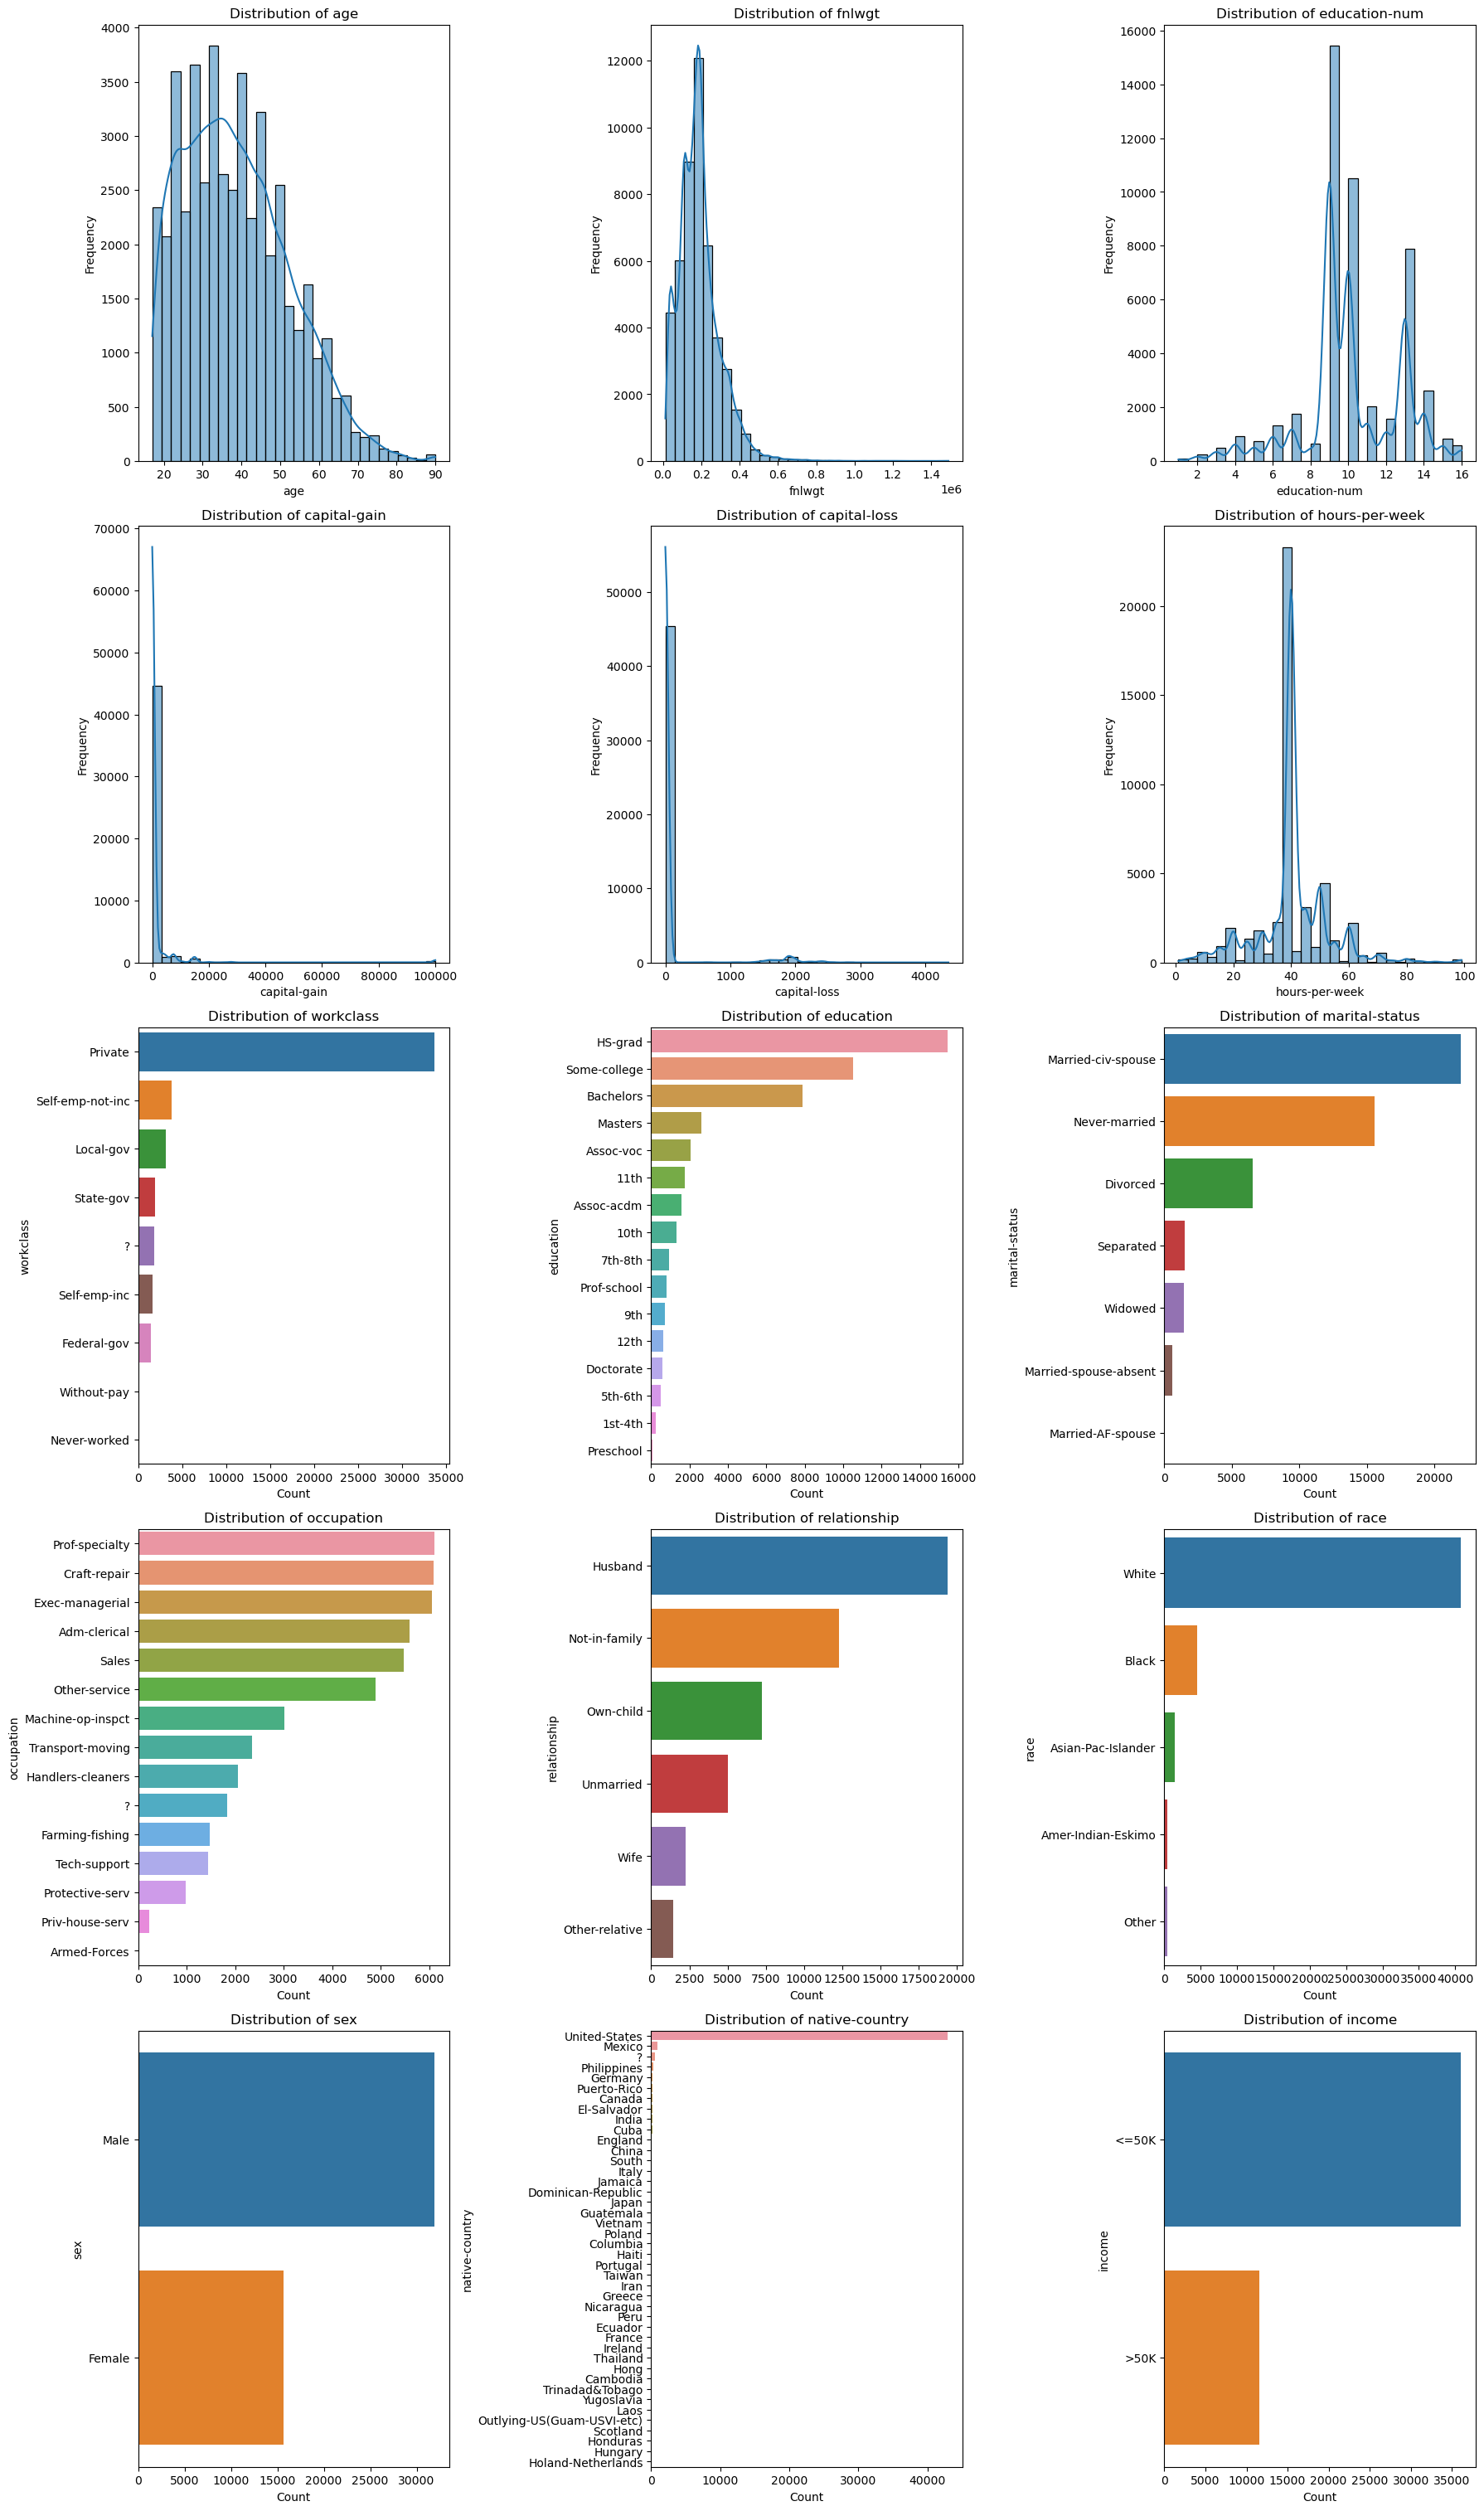

In [96]:


#Defining columns by data type
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Create subplots
num_plots = len(numerical_columns) + len(categorical_columns)
cols = 3
rows = (num_plots // cols) + 1

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()

# Plot numerical columns
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Plot categorical columns
for i, col in enumerate(categorical_columns, start=len(numerical_columns)):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_columns) + len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [97]:
# check for Data shape
df.shape

(47621, 15)

Now we will proceed to encode teh categoricla variables in readiness for model  training and development. Will Isolate country data as it is highly imbalanced. and do some feature engineering to create a new column called race. this will map to continnet of native country

In [98]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [39]:
#pip install country_converter #pip install wordcloud

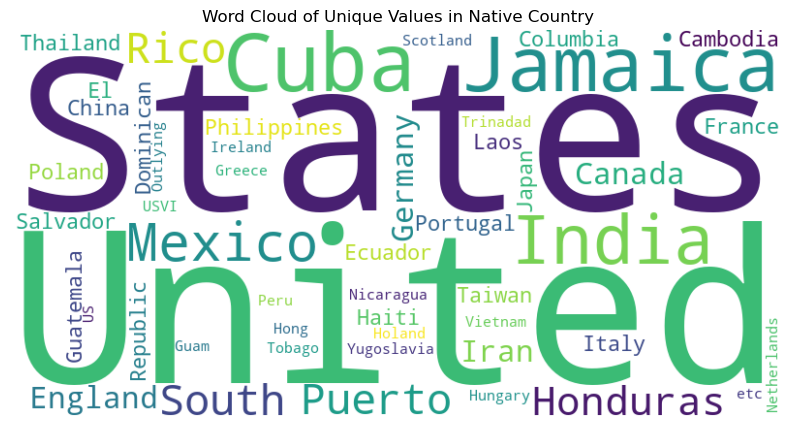

In [99]:
from wordcloud import WordCloud

# Concatenate all values into a single string
text = ' '.join(df['native-country'].unique())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Unique Values in Native Country')
plt.show()


In [100]:
#df.drop(columns=['race'], inplace=True)


In [101]:
import country_converter as coco

# Map countries to continents using a for loop
cc = coco.CountryConverter()
continent_mapping = {}
for country in df['native-country'].unique():
    continent = cc.convert(country, to='continent')
    continent_mapping[country] = continent if continent is not None else 'unknown'

# Apply mapping to create the 'race' column
df['race'] = df['native-country'].map(continent_mapping)

# Display the DataFrame
df.head()

? not found in regex
South not found in regex
Columbia not found in regex
Yugoslavia not found in regex
Scotland not found in regex
Hong not found in regex


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,America,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,America,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,America,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,America,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,America,Female,0,0,40,Cuba,<=50K


Now we are going to create a new column called race using a librray called country converter

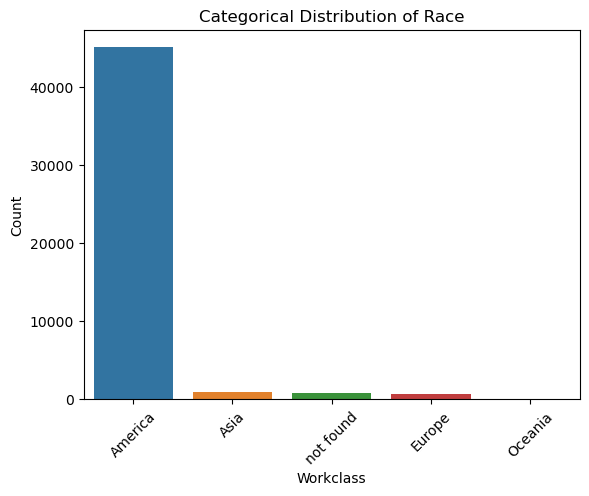

In [102]:
sns.countplot(x=df['race'], data=df)
plt.title('Categorical Distribution of Race')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [48]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income', 'race'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [104]:
df = df[[col for col in df if col != 'income'] + ['income']]
df3=df.copy()
df.head(2)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,America,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,America,Male,0,0,13,United-States,<=50K


In [128]:
df=df3.copy()


In [129]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Encoding Categorical variables


In [130]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [col for col in df.columns if col != 'income']
columns_to_encode = [col for col in df.columns]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

new_df = pd.DataFrame()

# Encode each column
for col in columns_to_encode:
    new_df[col] = label_encoder.fit_transform(df[col])

# Add the 'income' column to the new DataFrame
#new_df['income'] = df['income']

# Display the new DataFrame
new_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,3377,9,12,4,1,1,0,1,27,0,39,39,0
1,33,6,3698,9,12,2,4,0,0,1,0,0,12,39,0
2,21,4,17968,11,8,0,6,1,0,1,0,0,39,39,0
3,36,4,19585,1,6,2,6,0,0,1,0,0,39,39,0
4,11,4,24894,9,12,2,10,5,0,0,0,0,39,5,0


#### Split Features and target

In [131]:
X = new_df.iloc[:, :-1] #features
y = new_df['income'] #target



### Scaling  features 

In [133]:
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(scaled_X, columns = X.columns)
X = X.astype(float)


X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.875,0.120845,0.600000,0.800000,0.666667,0.071429,0.2,0.0,1.0,0.22314,0.0,0.410526,0.951220
1,0.452055,0.750,0.132331,0.600000,0.800000,0.333333,0.285714,0.0,0.0,1.0,0.00000,0.0,0.126316,0.951220
2,0.287671,0.500,0.642977,0.733333,0.533333,0.000000,0.428571,0.2,0.0,1.0,0.00000,0.0,0.410526,0.951220
3,0.493151,0.500,0.700841,0.066667,0.400000,0.333333,0.428571,0.0,0.0,1.0,0.00000,0.0,0.410526,0.951220
4,0.150685,0.500,0.890821,0.600000,0.800000,0.333333,0.714286,1.0,0.0,0.0,0.00000,0.0,0.410526,0.121951


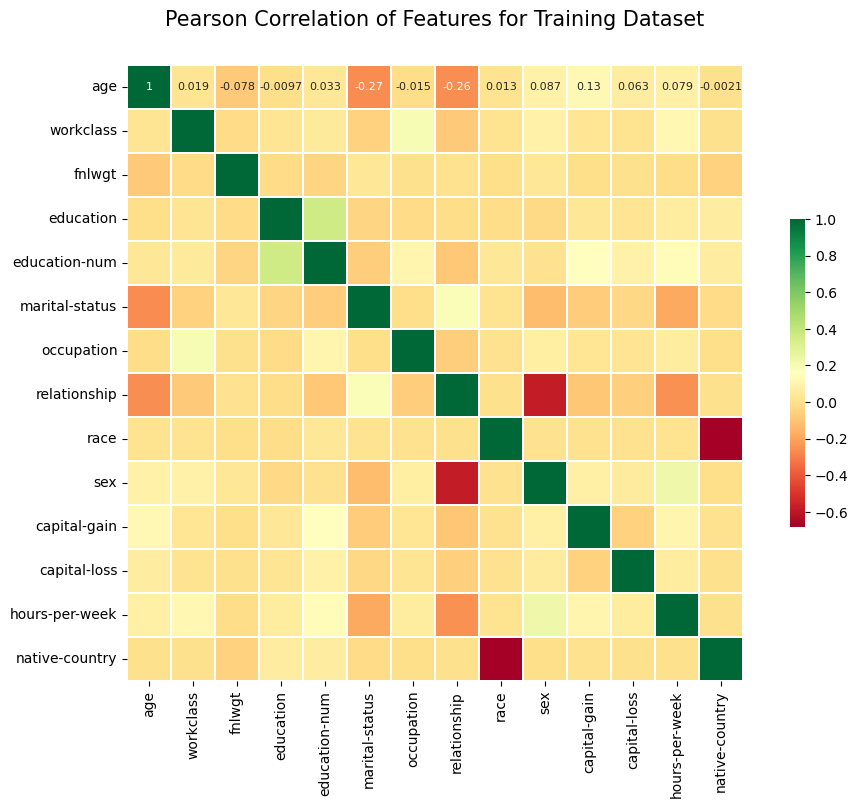

In [134]:
#correlation heatmap of dataset
def correlation_heatmap(X):
    _ , ax = plt.subplots(figsize =(12, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        X.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':8 }
    )
    
    plt.title('Pearson Correlation of Features for Training Dataset', y=1.05, size=15)

correlation_heatmap(X)

In [135]:
#new_df['income'] = label_encoder.fit_transform(new_df['income'])

#y = new_df['income']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (38096, 14)
Shape of X_test: (9525, 14)
Shape of y_train: (38096,)
Shape of y_test: (9525,)


In [136]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 38096 entries, 34154 to 15795
Series name: income
Non-Null Count  Dtype
--------------  -----
38096 non-null  int32
dtypes: int32(1)
memory usage: 446.4 KB


#### Model Training

In [137]:
# Initialize models
logistic_reg_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()

# Train models
logistic_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
y.unique()

array([0, 1])

In [139]:
# Evaluate models and store results
results = []

models = {
    'Logistic Regression': logistic_reg_model,
    'Random Forest': random_forest_model,
    'Decision Tree': decision_tree_model,
    'XGBoost': xgb_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.820892,0.722108,0.447983,0.552935,0.852501
1,Random Forest,0.849764,0.742902,0.600000,0.663848,0.903500
2,Decision Tree,0.810814,0.617211,0.618259,0.617734,0.746318
3,XGBoost,0.868766,0.784941,0.646285,0.708896,0.924991


In [140]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name, auc_score):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

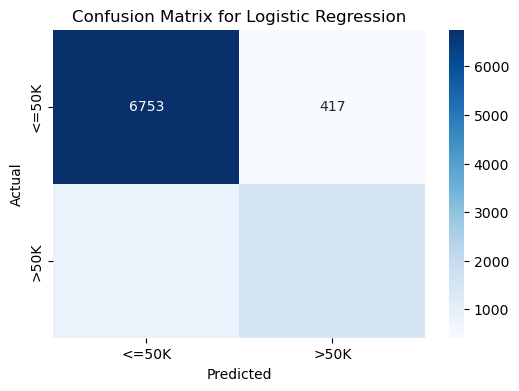

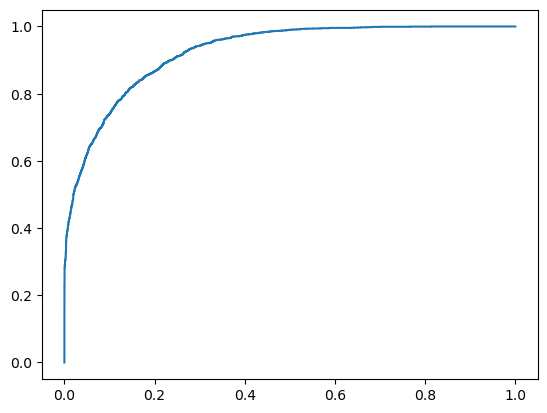

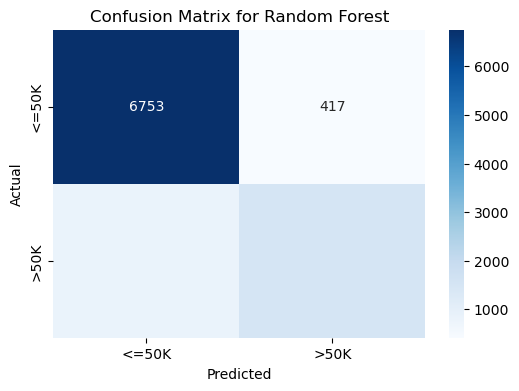

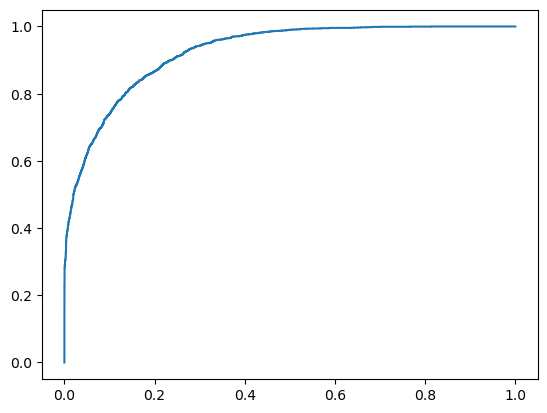

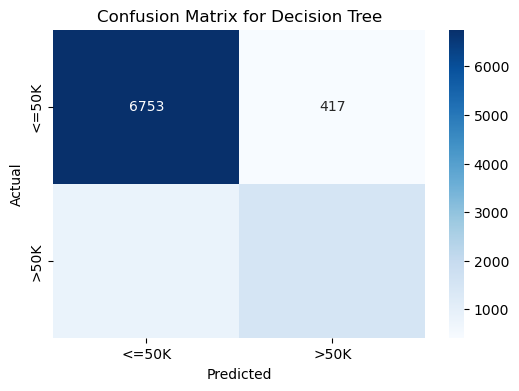

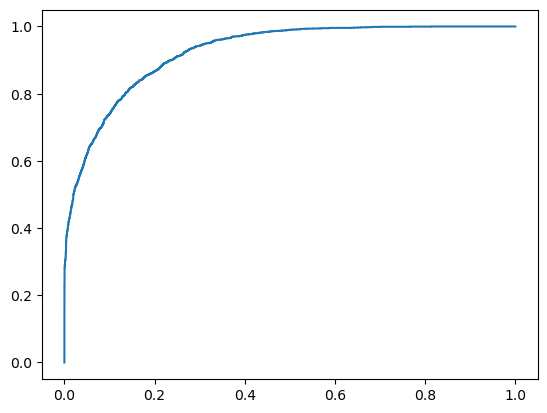

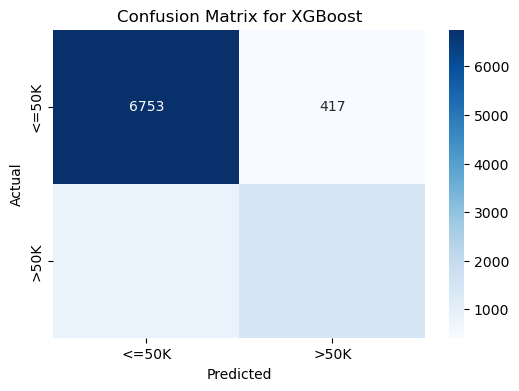

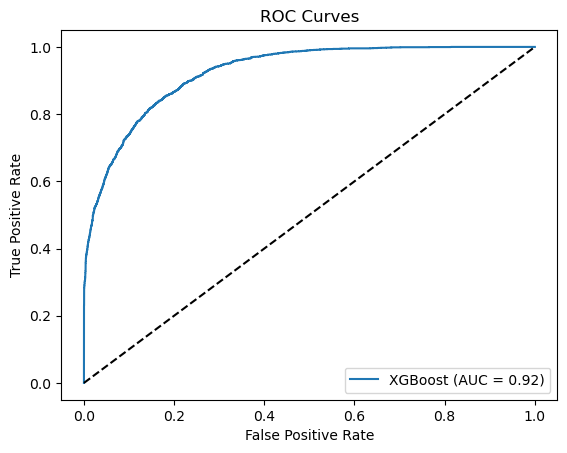

In [144]:
#fig, axes = plt.subplots(len(models), 2, figsize=(14, 20))
 
 # Print confusion matrix
for model_name, model in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plot_roc_curve(fpr, tpr, model_name, roc_auc)

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [145]:

# Classification Report with label names
target_names =['<=50k', '>50k']
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       <=50k       0.89      0.94      0.92      7170
        >50k       0.78      0.65      0.71      2355

    accuracy                           0.87      9525
   macro avg       0.84      0.79      0.81      9525
weighted avg       0.86      0.87      0.86      9525



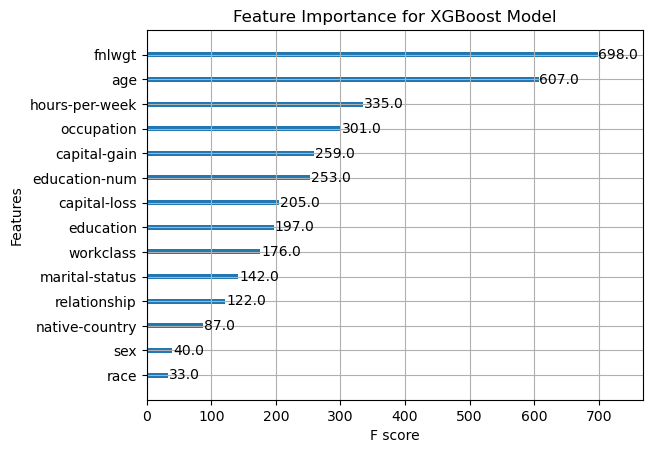

In [146]:
# Plot feature importance
xgb.plot_importance(xgb_model)
plt.title('Feature Importance for XGBoost Model')
plt.show()

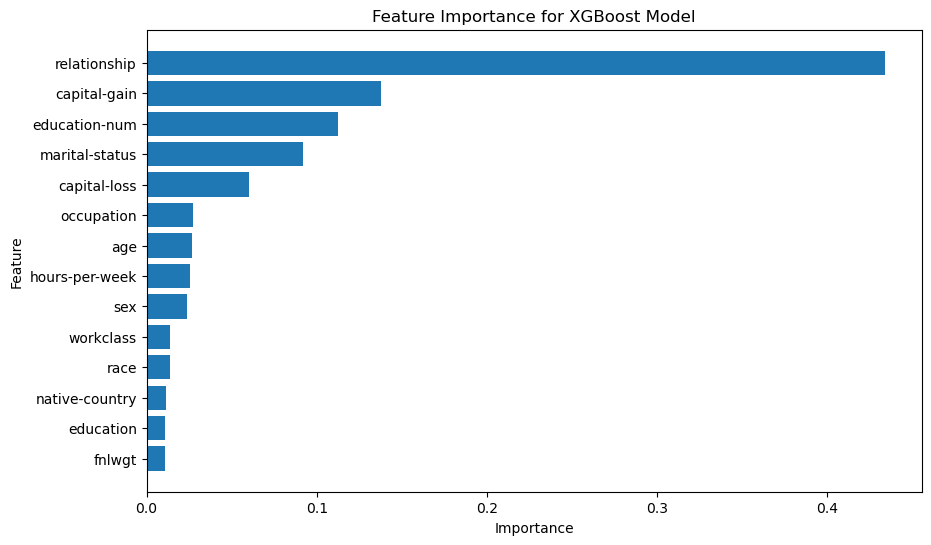

In [148]:

feature_importances = xgb_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

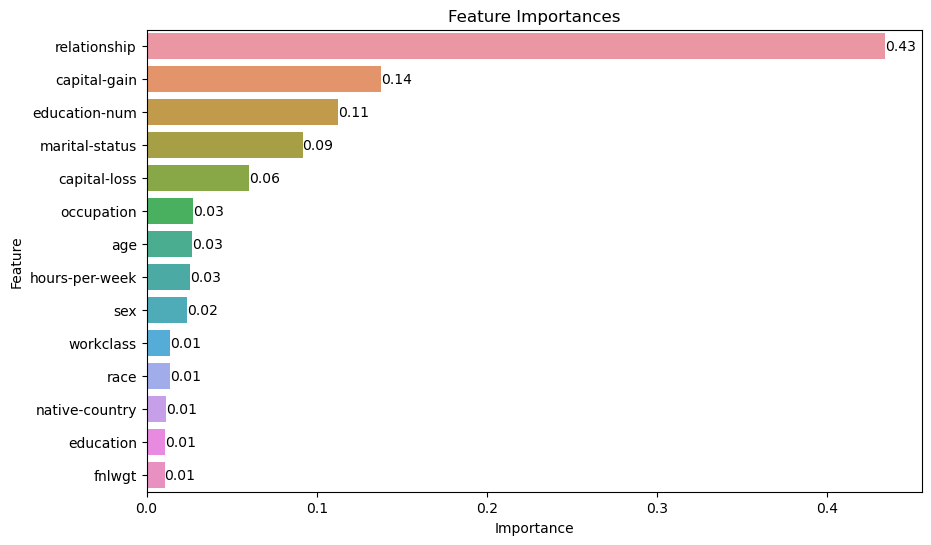

In [149]:

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort feature importances in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Annotate bars with feature importance values
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


### Trying logistic Regression

In [151]:
# Define the hyperparameter grid for logistic regression
from sklearn.metrics import confusion_matrix
param_grid = {'C': [0.1, 0.5, 1, 5, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 500, 1000]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Now I train a logistic regression model with the best hyperparameters
log_model = grid_search.best_estimator_
log_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion_m = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Confusion matrix: \n{confusion_m}')
print(f'ROC AUC score: {roc_auc}')

Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8205774278215223
Confusion matrix: 
[[6757  413]
 [1296 1059]]
ROC AUC score: 0.8525166786593111


In [152]:
print(f'Confusion matrix: \n{confusion_m}')
print(f'ROC AUC score: {roc_auc}')

Confusion matrix: 
[[6757  413]
 [1296 1059]]
ROC AUC score: 0.8525166786593111


In [153]:
log_model

LogisticRegression(C=10, random_state=42, solver='liblinear')

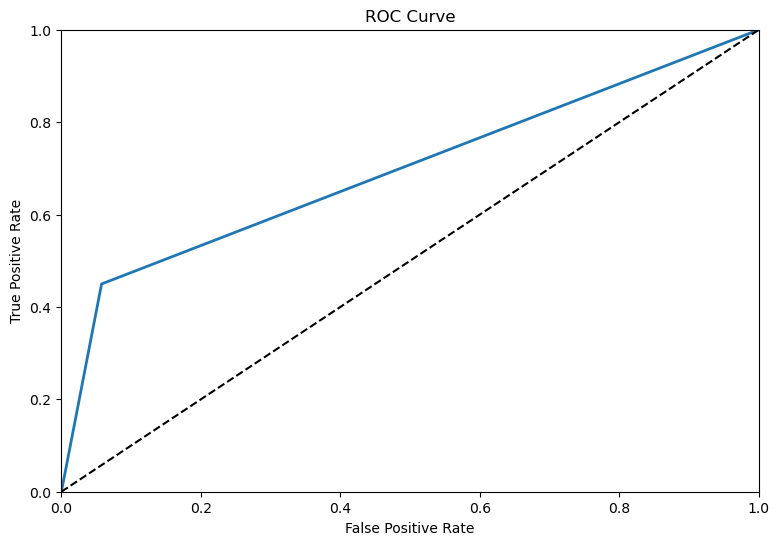

In [154]:
from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict(X_test))
plt.figure(figsize=(9,6)); 
plot_roc_curve(fpr, tpr)
plt.show();


In [65]:


# Get feature coefficients
coefficients = log_model.coef_[0]

# Get absolute feature coefficients
abs_coefficients = np.abs(coefficients)

# Map feature names to feature coefficients
feature_names = X_train.columns
feature_coefficients_map = dict(zip(feature_names, abs_coefficients))

# Sort feature coefficients in descending order
sorted_feature_coefficients = sorted(feature_coefficients_map.items(), key=lambda x: x[1], reverse=True)

# Print most important features
print("Most Important Features:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")


Most Important Features:
capital-gain: 31.870393859284693
education-num: 4.943775509313797
capital-loss: 2.9468134299839566
hours-per-week: 2.7810865108189415
age: 2.392895977397938
marital-status: 1.3746769665370007
sex: 0.8527681110840359
fnlwgt: 0.8061242936685846
relationship: 0.6980772119066126
race: 0.4703793064233019
workclass: 0.36873542613621285
education: 0.22352219612356133
occupation: 0.12333212814487084
native-country: 0.03929034556213272


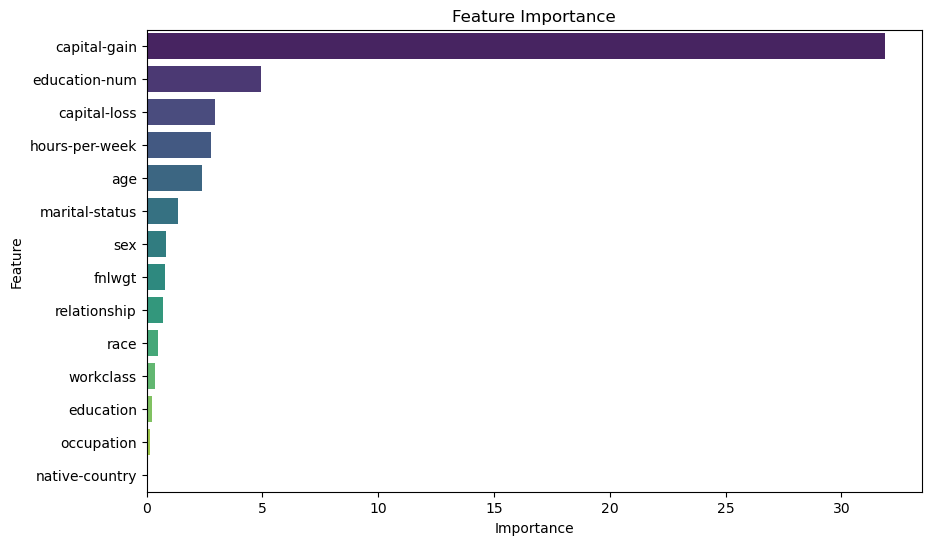

In [66]:
# Get absolute feature coefficients
abs_coefficients = np.abs(coefficients)

# Create DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs_coefficients})

# Sort feature importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()